## B04 - Augment Heatmaps.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/B04%20-%20Augment%20Heatmaps.ipynb

image.shape (161, 240, 3)
heatmap.shape (161, 240, 3)


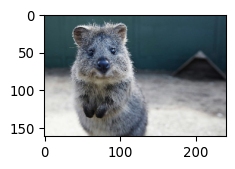

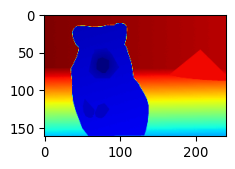

In [1]:
import imgaug as ia
#%matplotlib inline

image = ia.quokka(size=0.25)
heatmap = ia.quokka_heatmap(size=0.25)


print(f'image.shape {image.shape}')
print(f'heatmap.shape {heatmap.shape}')

ia.imshow(image)
ia.imshow(heatmap.draw()[0])



In [2]:

import numpy as np
print(type(heatmap))
print(type(heatmap.arr_0to1))  # the numpy heatmap array, normalized to [0.0, 1.0]
print(np.min(heatmap.arr_0to1), np.max(heatmap.arr_0to1))
print(image.shape, heatmap.arr_0to1.shape)



<class 'imgaug.augmentables.heatmaps.HeatmapsOnImage'>
<class 'numpy.ndarray'>
0.0 1.0
(161, 240, 3) (161, 240, 1)


image_aug.shape (161, 240, 3)
heatmap_aug.shape (161, 240, 3)


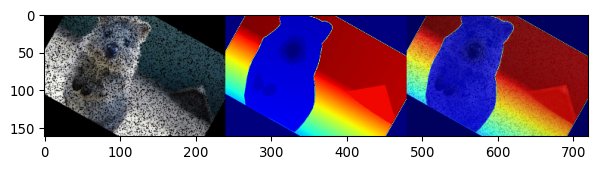

In [3]:

import imgaug.augmenters as iaa
ia.seed(2)

seq = iaa.Sequential([
    iaa.Dropout(0.2),
    iaa.Affine(rotate=(-45, 45))
])

image_aug, heatmap_aug = seq(image=image, heatmaps=heatmap)

print(f'image_aug.shape {image_aug.shape}')
print(f'heatmap_aug.shape {heatmap_aug.shape}')


ia.imshow(
    np.hstack([
        image_aug,
        heatmap_aug.draw()[0],
        heatmap_aug.draw_on_image(image_aug)[0]
    ]))





Original heatmap size: (161, 240, 1)
Resized heatmap size: (8, 12, 1)
Image size: (161, 240, 3)
heatmap_smaller size: (161, 240, 3)


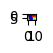

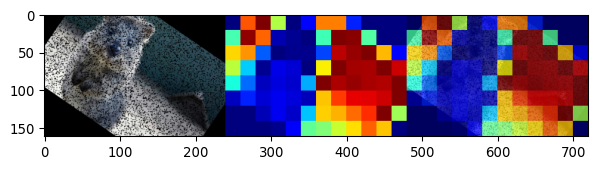

In [4]:

heatmap_smaller = heatmap.resize(0.05)
print("Original heatmap size:", heatmap.arr_0to1.shape)
print("Resized heatmap size:", heatmap_smaller.arr_0to1.shape)
print("Image size:", image.shape)
print("heatmap_smaller size:", heatmap_smaller.shape)
ia.imshow(heatmap_smaller.draw()[0])

image_aug, heatmap_smaller_aug = seq(image=image, heatmaps=heatmap_smaller)


ia.imshow(np.hstack([
    image_aug,
    heatmap_smaller_aug.draw(size=image_aug.shape[0:2])[0],
    heatmap_smaller_aug.draw_on_image(image_aug)[0]
]))





[shapes] resized: (40, 60, 1), avg pooled: (41, 60, 1), max pooled: (41, 60, 1)


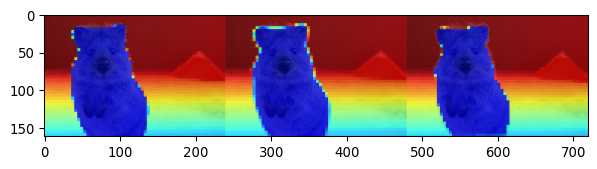

[shapes] resized: (20, 30, 1), avg pooled: (21, 30, 1), max pooled: (21, 30, 1)


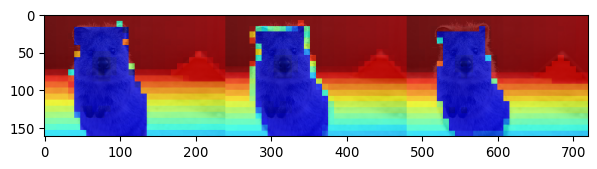

[shapes] resized: (10, 15, 1), avg pooled: (11, 15, 1), max pooled: (11, 15, 1)


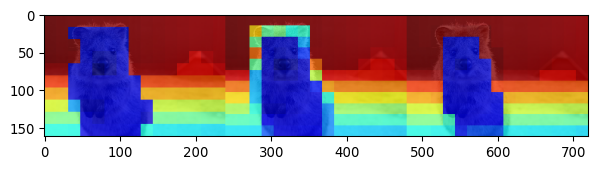

In [5]:


# reload the example heatmap, since we replaced it in the previous example
heatmap = ia.quokka_heatmap(size=0.25)

# test with 1/4th, 1/8th and 1/16th of the original image size
for factor in [4, 8, 16]:
    # resize/pool
    heatmap_resized = heatmap.resize(1/factor)
    heatmap_avg_pooled = heatmap.avg_pool(factor)
    heatmap_max_pooled = heatmap.max_pool(factor)

    # print heatmap sizes after resize/pool
    print("[shapes] resized: %s, avg pooled: %s, max pooled: %s" % (
        heatmap_resized.get_arr().shape,
        heatmap_avg_pooled.get_arr().shape,
        heatmap_max_pooled.get_arr().shape
    ))
    
    # visualize
    ia.imshow(
        np.hstack([
            heatmap_resized.draw_on_image(image)[0],
            heatmap_avg_pooled.draw_on_image(image)[0],
            heatmap_max_pooled.draw_on_image(image)[0]
        ])
    )









## B01 Augment Keypoints/Landmarks
https://github.com/aleju/imgaug-doc/blob/master/notebooks/B01%20-%20Augment%20Keypoints.ipynb




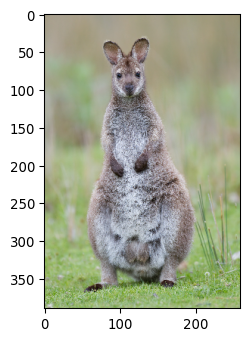

In [6]:

import imageio
import imgaug as ia
#%matplotlib inline

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/e/e6/Macropus_rufogriseus_rufogriseus_Bruny.jpg")
image = ia.imresize_single_image(image, (389, 259))
ia.imshow(image)



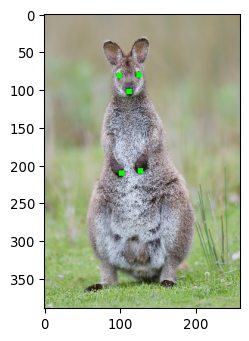

[Keypoint(x=99.00000000, y=81.00000000), Keypoint(x=125.00000000, y=80.00000000), Keypoint(x=112.00000000, y=102.00000000), Keypoint(x=102.00000000, y=210.00000000), Keypoint(x=127.00000000, y=207.00000000)]


In [7]:


from imgaug.augmentables.kps import Keypoint, KeypointsOnImage
kps = [
    Keypoint(x=99, y=81),   # left eye (from camera perspective)
    Keypoint(x=125, y=80),  # right eye
    Keypoint(x=112, y=102), # nose
    Keypoint(x=102, y=210), # left paw
    Keypoint(x=127, y=207)  # right paw
]
kpsoi = KeypointsOnImage(kps, shape=image.shape)

ia.imshow(kpsoi.draw_on_image(image, size=7))

print(kpsoi.keypoints)



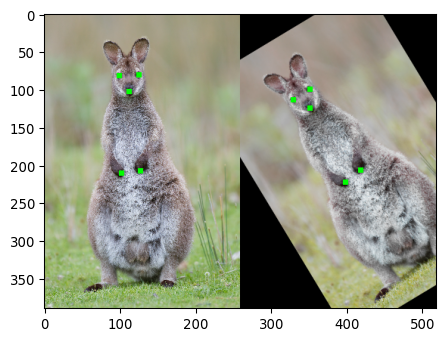

In [8]:



import imgaug.augmenters as iaa
ia.seed(3)

seq = iaa.Sequential([
    iaa.Affine(translate_px={"x": (10, 30)}, rotate=(-40, 40)),
    iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
])

image_aug, kpsoi_aug = seq(image=image, keypoints=kpsoi)



import numpy as np
ia.imshow(
    np.hstack([
        kpsoi.draw_on_image(image, size=7),
        kpsoi_aug.draw_on_image(image_aug, size=7)
    ])
)




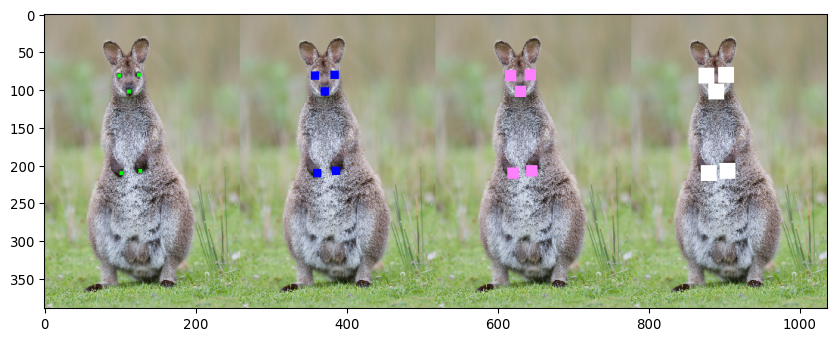

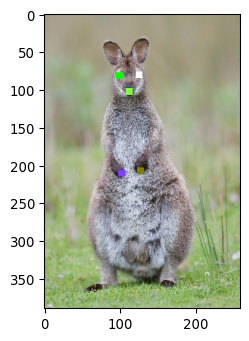

In [9]:


ia.imshow(np.hstack([
    kpsoi.draw_on_image(image, size=5, color=(0, 255, 0)),
    kpsoi.draw_on_image(image, size=10, color=(0, 0, 255)),
    kpsoi.draw_on_image(image, size=15, color=(255, 128, 255)),
    kpsoi.draw_on_image(image, size=20, color=(255, 255, 255))
]))


colors = [(0, 255, 0),
          (255, 255, 255),
          (128, 255, 64),
          (128, 64, 255),
          (128, 128, 0)]
image_drawn = np.copy(image)
for kp, color in zip(kpsoi.keypoints, colors):
    image_drawn = kp.draw_on_image(image_drawn, color=color, size=9, copy=False)
ia.imshow(image_drawn)


Image shape: (389, 259, 3)
Distance maps shape: (389, 259, 5)
Distance maps dtype: float32
Distance maps min: 0.0 max: 345.7311
min: 0.0 max: 0.7397929


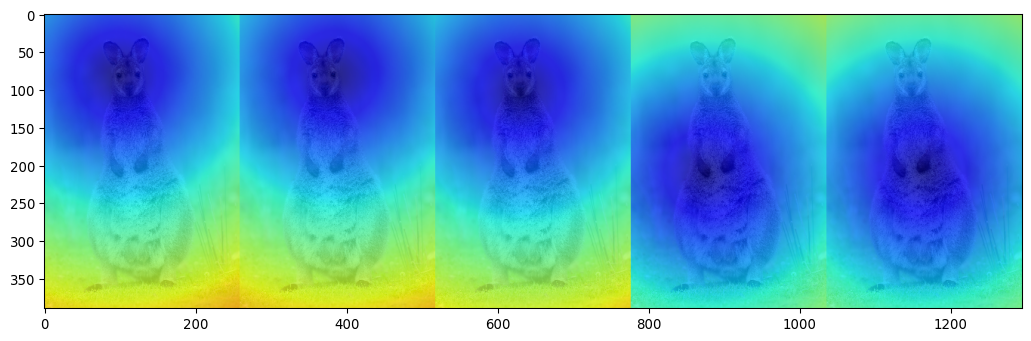

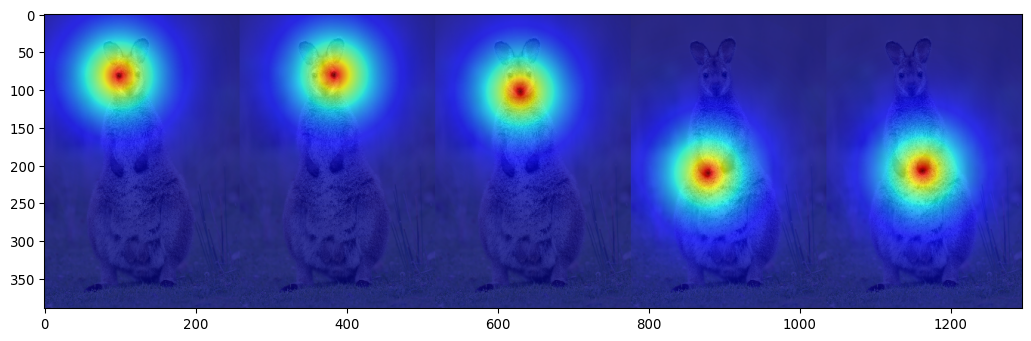

In [10]:
distance_maps = kpsoi.to_distance_maps()
print("Image shape:", kpsoi.shape)
print("Distance maps shape:", distance_maps.shape)
print("Distance maps dtype:", distance_maps.dtype)
print("Distance maps min:", distance_maps.min(), "max:", distance_maps.max())



height, width = kpsoi.shape[0:2]
max_distance = np.linalg.norm(np.float32([height, width]))
distance_maps_normalized = distance_maps / max_distance
print("min:", distance_maps.min(), "max:", distance_maps_normalized.max())

from imgaug.augmentables.heatmaps import HeatmapsOnImage
heatmaps = HeatmapsOnImage(distance_maps_normalized, shape=kpsoi.shape)
ia.imshow(np.hstack(heatmaps.draw_on_image(image)))



heatmaps = HeatmapsOnImage((1.0 - distance_maps_normalized)**10, shape=kpsoi.shape)
ia.imshow(np.hstack(heatmaps.draw_on_image(image)))





## B02 - Augment Bounding Boxes.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/B02%20-%20Augment%20Bounding%20Boxes.ipynb
    
    

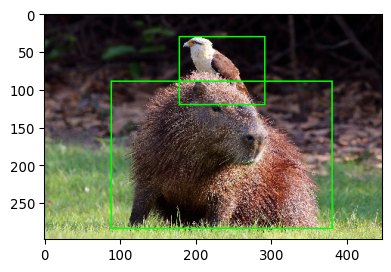

In [11]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
ia.seed(1)

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/8/8e/Yellow-headed_caracara_%28Milvago_chimachima%29_on_capybara_%28Hydrochoeris_hydrochaeris%29.JPG")
image = ia.imresize_single_image(image, (298, 447))

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=0.2*447, x2=0.85*447, y1=0.3*298, y2=0.95*298),
    BoundingBox(x1=0.4*447, x2=0.65*447, y1=0.1*298, y2=0.4*298)
], shape=image.shape)

ia.imshow(bbs.draw_on_image(image, size=2))

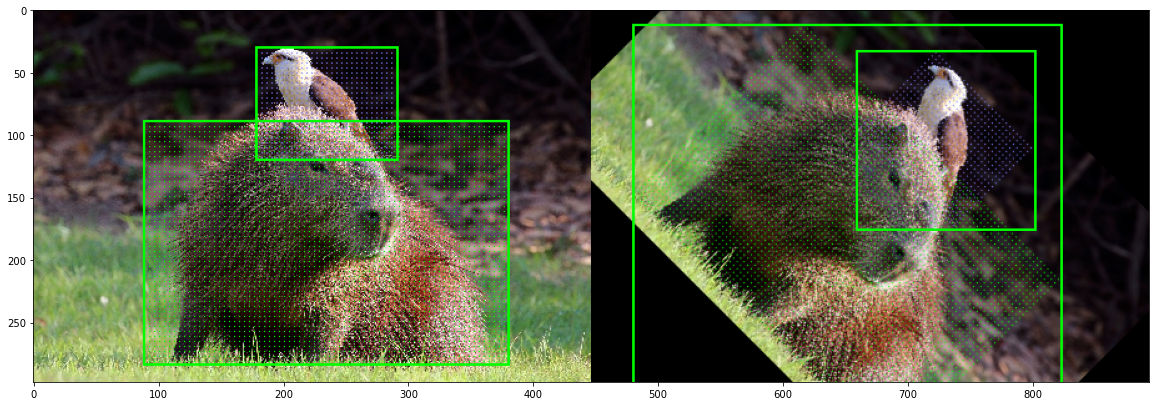

In [12]:


import numpy as np
import matplotlib.pyplot as plt

# highlight the area of each bounding box
image_points = np.copy(image)
colors = [(0, 255, 0), (128, 128, 255)]
for bb, color in zip(bbs.bounding_boxes, colors):
    image_points[bb.y1_int:bb.y2_int:4, bb.x1_int:bb.x2_int:4] = color

# rotate the image with the highlighted bounding box areas
rot = iaa.Affine(rotate=45)
image_points_aug, bbs_aug = rot(image=image_points, bounding_boxes=bbs)

# visualize
side_by_side = np.hstack([
    bbs.draw_on_image(image_points, size=2),
    bbs_aug.draw_on_image(image_points_aug, size=2)
])
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(side_by_side)



## B03 - Augment Polygons.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/B03%20-%20Augment%20Polygons.ipynb


(650, 789, 3)


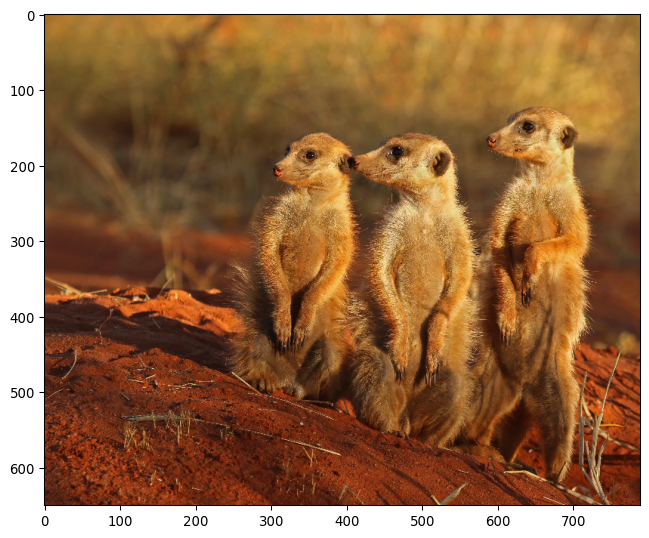

In [13]:


import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/9/9a/Meerkat_%28Suricata_suricatta%29_Tswalu.jpg")
image = ia.imresize_single_image(image, 0.25)
print(image.shape)

ia.imshow(image)



In [14]:


from imgaug.augmentables.polys import Polygon, PolygonsOnImage

# left meerkat
meerkat_left = Polygon([
    (350, 100),  # top left
    (390, 85),  # top
    (435, 110),  # top right
    (435, 170),
    (445, 250),  # right elbow
    (430, 290),  # right hip
    (440, 300),
    (420, 340),
    (440, 400),
    (410, 450),  # right foot
    (320, 430),
    (280, 410),  # left foot
    (300, 350),
    (300, 210),  # left elbow
    (340, 160),
    (325, 140)  # nose
])

# center meerkat
meerkat_center = Polygon([
    (430, 120),  # left top (nose)
    (510, 90),  # top
    (550, 95),  # top right
    (570, 120),  # ear
    (600, 230),
    (600, 450),
    (560, 510),  # bottom right
    (450, 480),  # bottom left
    (430, 340),
    (450, 250),  # elbow
    (500, 165),  # neck
    (430, 145)
])

# right meerkat
meerkat_right = Polygon([
    (610, 95),  # nose top
    (650, 60),  # top
    (680, 50),  # top
    (710, 60),
    (730, 80),  # top right
    (730, 140),
    (755, 220),
    (750, 340),
    (730, 380),
    (740, 420),
    (715, 560),  # right foot
    (690, 550),
    (680, 470),
    (640, 530),
    (590, 500),  # left foot
    (605, 240),  # left elbow
    (655, 130),  # neck
    (620, 120),  # mouth, bottom
])



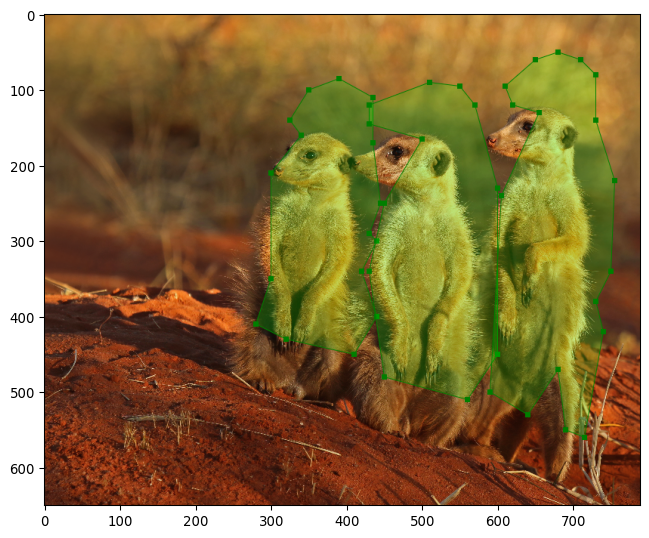

In [15]:


import numpy as np
image_polys = np.copy(image)
image_polys = meerkat_left.draw_on_image(image_polys, alpha_face=0.2, size_points=7)
image_polys = meerkat_center.draw_on_image(image_polys, alpha_face=0.2, size_points=7)
image_polys = meerkat_right.draw_on_image(image_polys, alpha_face=0.2, size_points=7)
ia.imshow(image_polys)



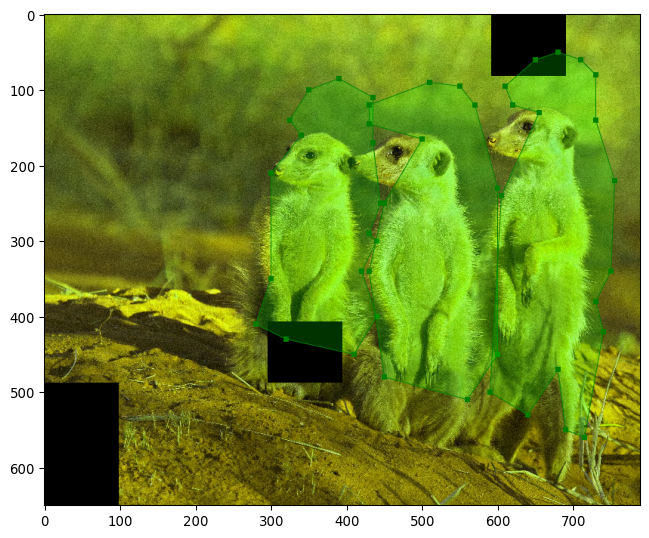

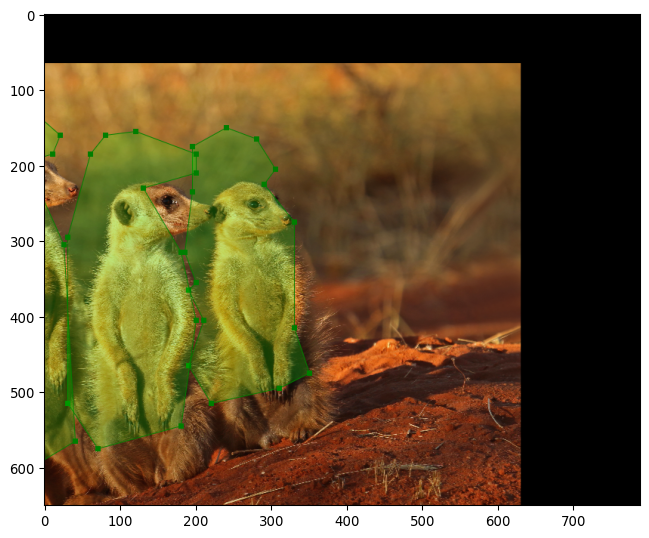

In [16]:
psoi = ia.PolygonsOnImage([meerkat_left, meerkat_center, meerkat_right],
                          shape=image.shape)



import imgaug.augmenters as iaa
ia.seed(1)

aug = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=10),
    iaa.CoarseDropout(0.1, size_px=8),
    iaa.AddToHueAndSaturation((-50, 50))
])

image_aug, psoi_aug = aug(image=image, polygons=psoi)
ia.imshow(psoi_aug.draw_on_image(image_aug, alpha_face=0.2, size_points=7))




aug = iaa.Sequential([
    iaa.Affine(translate_percent={"x": 0.2, "y": 0.1}),
    iaa.Fliplr(1.0)
])

image_aug, psoi_aug = aug(image=image, polygons=psoi)
ia.imshow(psoi_aug.draw_on_image(image_aug, alpha_face=0.2, size_points=7))



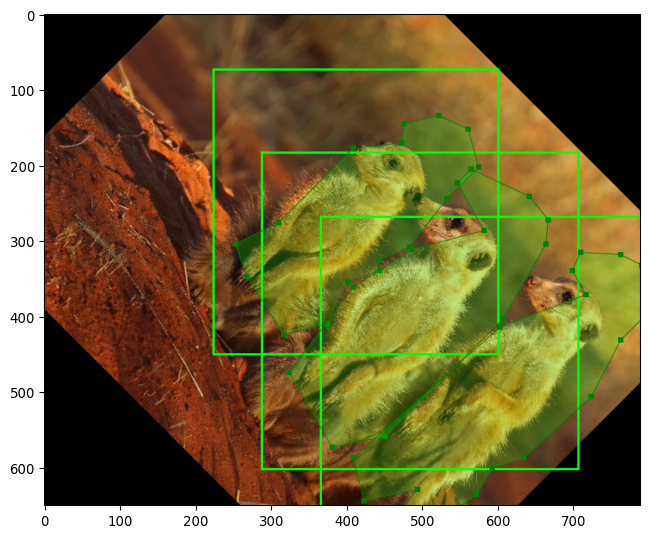

In [17]:
from imgaug.augmentables.bbs import BoundingBoxesOnImage

# Convert polygons to BBs and put them in BoundingBoxesOnImage instance
# we will need that instance below to easily draw all augmented BBs on the image
bbsoi = BoundingBoxesOnImage(
    [polygon.to_bounding_box() for polygon in psoi.polygons],
    shape=psoi.shape
)

# augment image, BBs and polygons
batch_aug = iaa.Affine(rotate=45)(
    images=[image],
    bounding_boxes=bbsoi,
    polygons=psoi,
    return_batch=True)

images_aug = batch_aug.images_aug
bbsoi_aug = batch_aug.bounding_boxes_aug
psoi_aug = batch_aug.polygons_aug

# visualize
ia.imshow(
    psoi_aug.draw_on_image(
        bbsoi_aug.draw_on_image(images_aug[0], size=3),
        alpha_face=0.2, size_points=7
    )
)

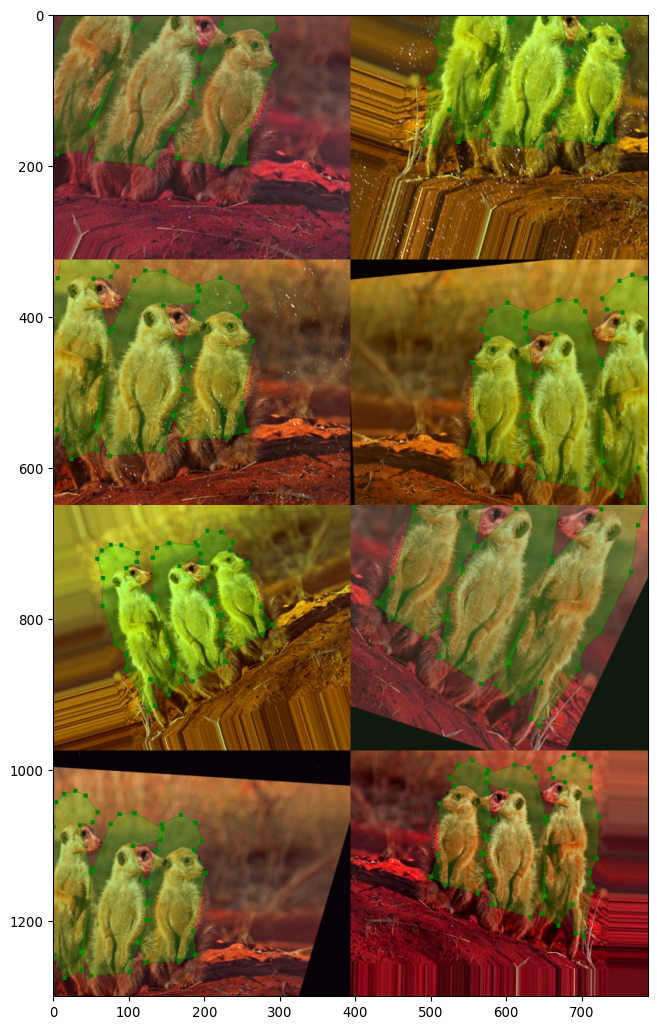

In [18]:


ia.seed(2)
aug = iaa.Sequential([
    iaa.Affine(rotate=(-20, 20), translate_percent=(-0.2, 0.2), scale=(0.8, 1.2),
               mode=["constant", "edge"], cval=0),
    iaa.Fliplr(0.5),
    iaa.PerspectiveTransform((0.01, 0.1)),
    iaa.AddToHueAndSaturation((-20, 20)),
    iaa.LinearContrast((0.8, 1.2), per_channel=0.5),
    iaa.Sometimes(0.75, iaa.Snowflakes())
])

images_polys_aug = []
for _ in range(2*4):
    image_aug, psoi_aug = aug(image=image, polygons=psoi)
    image_polys_aug = psoi_aug.draw_on_image(image_aug, alpha_face=0.2, size_points=11)
    images_polys_aug.append(ia.imresize_single_image(image_polys_aug, 0.5))

ia.imshow(ia.draw_grid(images_polys_aug, cols=2))

